In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# define semesta

In [28]:
waktu_tunggu = ctrl.Antecedent(np.arange(0, 61, 1), 'waktu_tunggu')
infrared1 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'infrared1')
infrared2 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'infrared2')
tambah_waktu = ctrl.Consequent(np.arange(0, 16, 1), 'tambah_waktu')

# Membership function


In [29]:
waktu_tunggu['LOW'] = fuzz.trimf(waktu_tunggu.universe, [0, 0, 30])
waktu_tunggu['HIGH'] = fuzz.trimf(waktu_tunggu.universe, [30, 60, 60])

infrared1['TIDAK_ADA'] = fuzz.trimf(infrared1.universe, [0, 0, 0])
infrared1['ADA'] = fuzz.trimf(infrared1.universe, [1, 1, 1])

infrared2['TIDAK_ADA'] = fuzz.trimf(infrared2.universe, [0, 0, 0])
infrared2['ADA'] = fuzz.trimf(infrared2.universe, [1, 1, 1])

tambah_waktu['TIDAK_TAMBAH'] = fuzz.trimf(tambah_waktu.universe, [0, 0, 0])
tambah_waktu['TAMBAH_5_DETIK'] = fuzz.trimf(tambah_waktu.universe, [0, 5, 10])
tambah_waktu['TAMBAH_10_DETIK'] = fuzz.trimf(tambah_waktu.universe, [5, 10, 15])
tambah_waktu['TAMBAH_15_DETIK'] = fuzz.trimf(tambah_waktu.universe, [10, 15, 15])

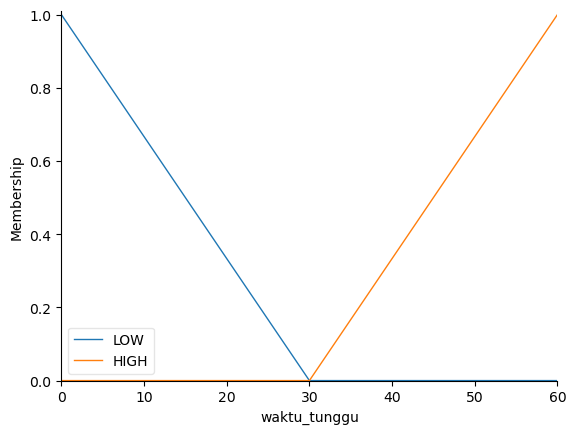

In [30]:
waktu_tunggu.view() 

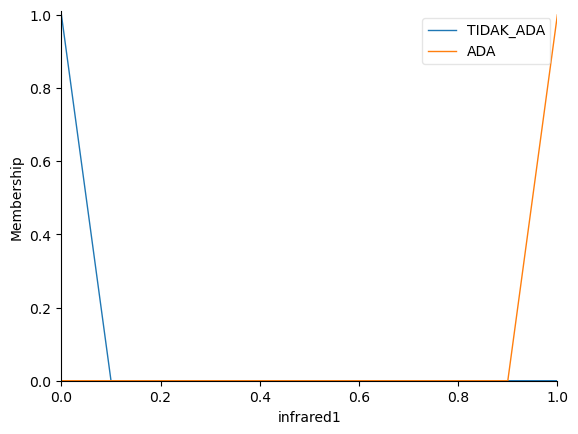

In [31]:
infrared1.view()

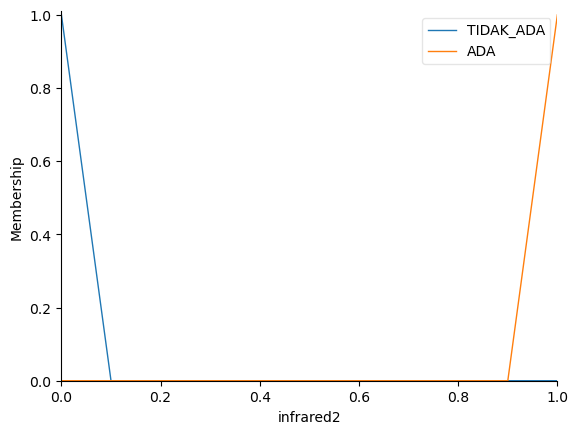

In [32]:
infrared2.view()

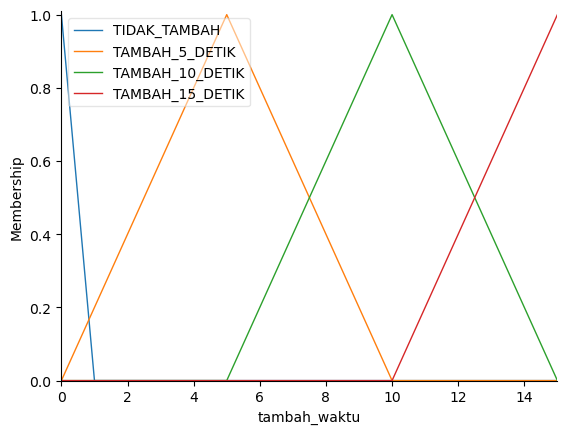

In [26]:
tambah_waktu.view()

# define rule


In [16]:
rule1 = ctrl.Rule(waktu_tunggu['LOW'] & infrared1['TIDAK_ADA'] & infrared2['TIDAK_ADA'], tambah_waktu['TIDAK_TAMBAH'])
rule2 = ctrl.Rule(waktu_tunggu['LOW'] & infrared1['TIDAK_ADA'] & infrared2['ADA'], tambah_waktu['TAMBAH_5_DETIK'])
rule3 = ctrl.Rule(waktu_tunggu['LOW'] & infrared1['ADA'] & infrared2['TIDAK_ADA'], tambah_waktu['TAMBAH_5_DETIK'])
rule4 = ctrl.Rule(waktu_tunggu['LOW'] & infrared1['ADA'] & infrared2['ADA'], tambah_waktu['TAMBAH_10_DETIK'])
rule5 = ctrl.Rule(waktu_tunggu['HIGH'] & infrared1['TIDAK_ADA'] & infrared2['TIDAK_ADA'], tambah_waktu['TAMBAH_5_DETIK'])
rule6 = ctrl.Rule(waktu_tunggu['HIGH'] & infrared1['TIDAK_ADA'] & infrared2['ADA'], tambah_waktu['TAMBAH_10_DETIK'])
rule7 = ctrl.Rule(waktu_tunggu['HIGH'] & infrared1['ADA'] & infrared2['TIDAK_ADA'], tambah_waktu['TAMBAH_10_DETIK'])
rule8 = ctrl.Rule(waktu_tunggu['HIGH'] & infrared1['ADA'] & infrared2['ADA'], tambah_waktu['TAMBAH_15_DETIK'])

In [17]:
waktu_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
waktu_simulasi = ctrl.ControlSystemSimulation(waktu_ctrl)

In [18]:
waktu_simulasi.input['waktu_tunggu'] = 15
waktu_simulasi.input['infrared1'] = 1
waktu_simulasi.input['infrared2'] = 0
waktu_simulasi.compute()

Output tambah_waktu: 4.999999999999999
Total Waktu: 20.0


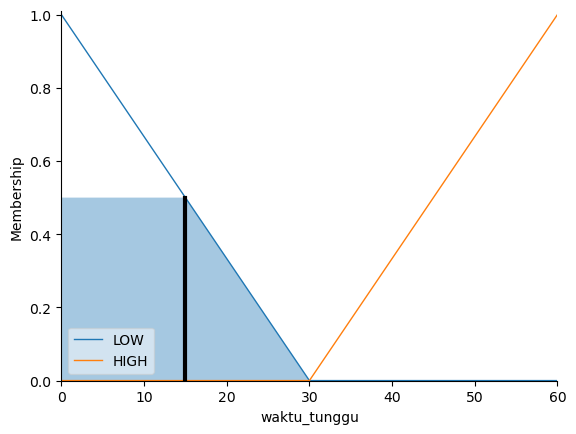

In [20]:
# Output
print("Output tambah_waktu:", waktu_simulasi.output['tambah_waktu'])

lampu_hijau = 15 

# Total Waktu
total_waktu = waktu_simulasi.output['tambah_waktu'] + lampu_hijau
print("Total Waktu:", total_waktu)

waktu_tunggu.view(sim=waktu_simulasi)